# Fireup Graph Lab Create

In [1]:
%matplotlib inline
import graphlab

A newer version of GraphLab Create (v2.0.1) is available! Your current version is v1.10.1.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [2]:
sales = graphlab.SFrame('home_data.gl/')

[INFO] graphlab.cython.cy_server: GraphLab Create v1.10.1 started. Logging: /tmp/graphlab_server_1468334178.log


This non-commercial license of GraphLab Create is assigned to neo20iitkgp@gmail.com and will expire on July 05, 2017. For commercial licensing options, visit https://turi.com/buy/.


In [3]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


# Exploring the data for house sales

In [4]:
graphlab.canvas.set_target('ipynb')
sales.show(view= 'Scatter Plot', x = 'sqft_living', y='price')

# Create a simple model of sqf of living and price

In [5]:
train_data,test_data = sales.random_split(.8, seed=0)

# Build the regrassion Model

In [6]:
sqft_model = graphlab.linear_regression.create(train_data, target= 'price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16438

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.024188     | 4323580.713062     | 1192229.405122       | 265193.676923 | 220442.872231   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

# Evaluate The Model

In [7]:
print sqft_model.evaluate(test_data)

{'max_error': 4123192.3891082285, 'rmse': 255257.47237577607}


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

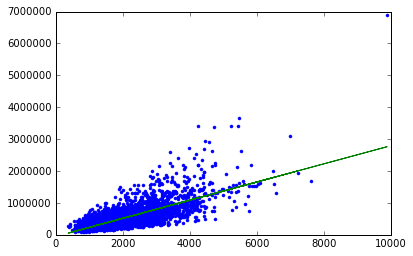

In [10]:
plt.plot(test_data['sqft_living'],test_data['price'],'.', 
         test_data['sqft_living'], sqft_model.predict(test_data), '-')

In [11]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-52317.1465609,5097.79447557
sqft_living,None,284.542442614,2.23804843986


# Explore other features

In [12]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [13]:
sales[my_features].show()

In [14]:
sales.show(view= 'BoxWhisker Plot', x='zipcode', y='price')

# Build a regression model with more freatures

In [15]:
my_features_model = graphlab.linear_regression.create(train_data, target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16560

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.036191     | 3753305.895604     | 1331207.860498       | 182452.613274 | 171672.186156   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [16]:
print my_features_model

Class                         : LinearRegression

Schema
------
Number of coefficients        : 115
Number of examples            : 16560
Number of feature columns     : 6
Number of unpacked features   : 6

Hyperparameters
---------------
L1 penalty                    : 0.0
L2 penalty                    : 0.01

Training Summary
----------------
Solver                        : newton
Solver iterations             : 1
Solver status                 : SUCCESS: Optimal solution found.
Training time (sec)           : 0.0555

Settings
--------
Residual sum of squares       : 5.51265112856e+14
Training RMSE                 : 182452.6133

Highest Positive Coefficients
-----------------------------
bathrooms[8]                  : 1736324.4701
zipcode[98039]                : 1189313.641
bathrooms[5.75]               : 1132408.3907
bathrooms[6]                  : 1038888.6791
bathrooms[6.25]               : 921271.8796

Lowest Negative Coefficients
----------------------------
bedrooms[10]        

In [17]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4123192.3891082285, 'rmse': 255257.47237577607}
{'max_error': 3459083.769148753, 'rmse': 179550.7974297731}


# Apply learned model to predict 3 houses price

In [18]:
house1 = sales[sales['id'] =='5309101200']

In [19]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [20]:
print house1['price']

[620000, ... ]


In [21]:
print sqft_model.predict(house1)

[630584.71571273]


In [22]:
print my_features_model.predict(house1)

[722162.9299354439]


In [23]:
house2 = sales[sales['id'] == '1925069082']

In [24]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [25]:
print sqft_model.predict(house2)

[1267959.7871681442]


In [26]:
print my_features_model.predict(house2)

[1450774.2551164567]


In [27]:
sqft_living = sales['sqft_living']
count = len([i for i in sqft_living if i>=2000 and i<=4000])
print count

9221


In [28]:
from __future__ import division
print count/len(sqft_living)

0.426641373248
